## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# working_path='/content/drive/MyDrive/Colab Notebooks/M1W4-EDA-Capstone Project-Telecom Churn/'
# df=pd.read_csv(working_path+'Telecom Churn.csv')

In [ ]:
#reading file 
df = pd.read_csv('https://raw.githubusercontent.com/mayankus/Capstone-Project-EDA/main/Telecom%20Churn.csv')

In [ ]:
#checking first 15 rows to have proper understanding of data
df.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
#renaming columns to standard format. Removing Spaces in Column names
df.columns=[x.replace(' ','_').lower() for x in list(df.columns)]
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [ ]:
#checking column name 
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#checking information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

**Observation**: 

---
1. There are 3333 entries in our DataFrame which ranges from 0 to 3332.
2. There are 20 columns in our DataFrame.
3. There is no null values in DataFrame.
4. Different types of data such as boolean, float , integer and object are avalable in our DataFrame.











In [ ]:
#checking for any missing values
df.isna().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

**Observation** 

---
There is no missing values in Telecom Churn Data

In [ ]:
#checking different values and their count 'churn' column holds.
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [ ]:
#Check churn data is balanced or imbalanced
df['churn'].value_counts()/len(df['churn'])*100

False    85.508551
True     14.491449
Name: churn, dtype: float64

**Observation** 

---

Churn data is highly imbalanced with ratio=85.5:14.5

So we analyze the data with other features while taking the target values separately to get some insights


In [ ]:
# df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [ ]:
# df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [ ]:
#copying df to another variable
tele_df=df.copy()

In [ ]:
#checking first 5 rows of the copied df
tele_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Text(0, 0.5, 'Percentage')

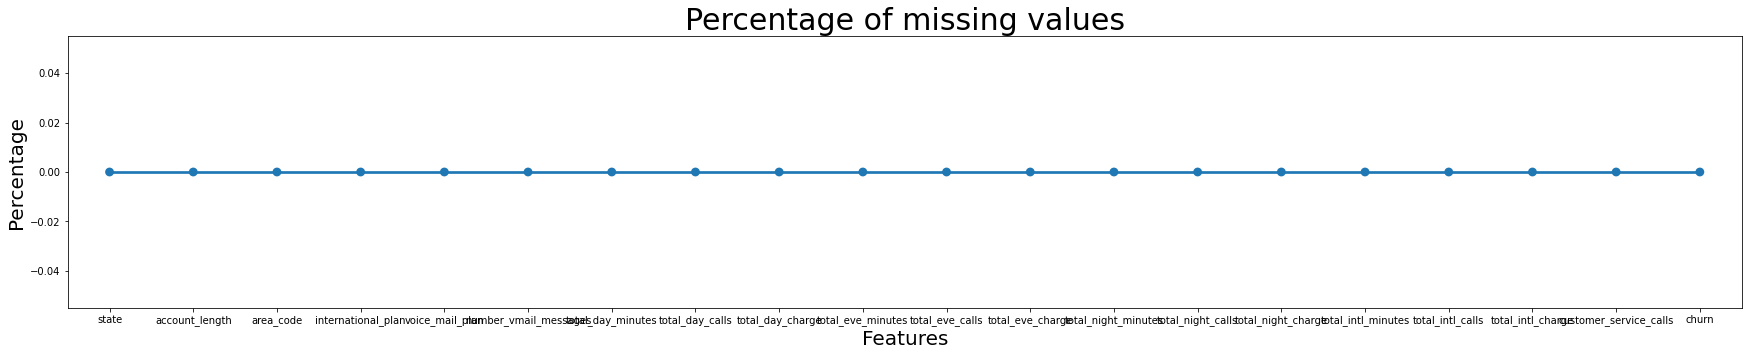

In [ ]:
# Percentage of missing values plotted against each feature of tele_df
missing_df=pd.DataFrame(tele_df.isnull().sum()*100/tele_df.shape[0]).reset_index()
plt.figure(figsize=(30,5))
sns.pointplot(x='index',y=0,data=missing_df)
plt.title('Percentage of missing values',fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Percentage',fontsize=20)

In [ ]:
#checking first 5 rows of missing df
missing_df.head()

,index,0
0,state,0.0
1,account_length,0.0
2,area_code,0.0
3,international_plan,0.0
4,voice_mail_plan,0.0


**Observation** 

---
From the above plot we can say that we don't have any missing data 

 **Data Exploration**




 1.Plot distribution of individual predictors by churn

**Univariate Analysis**

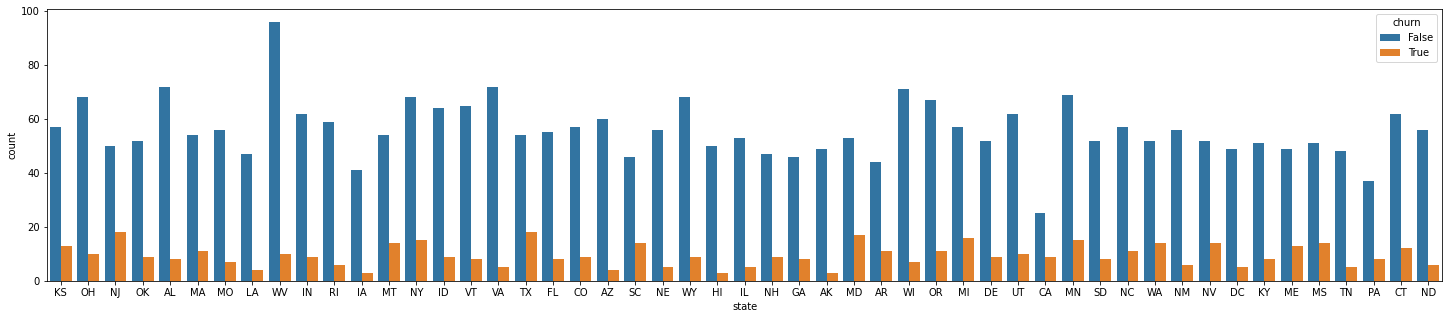

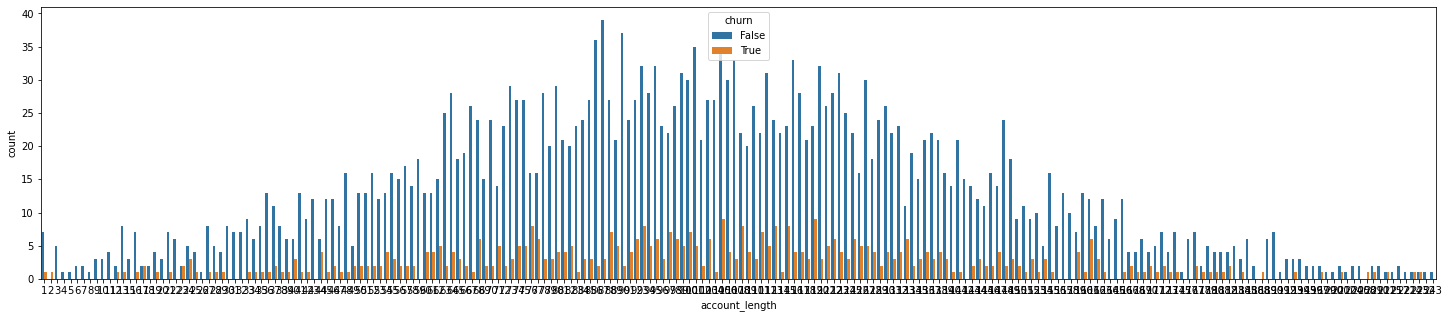

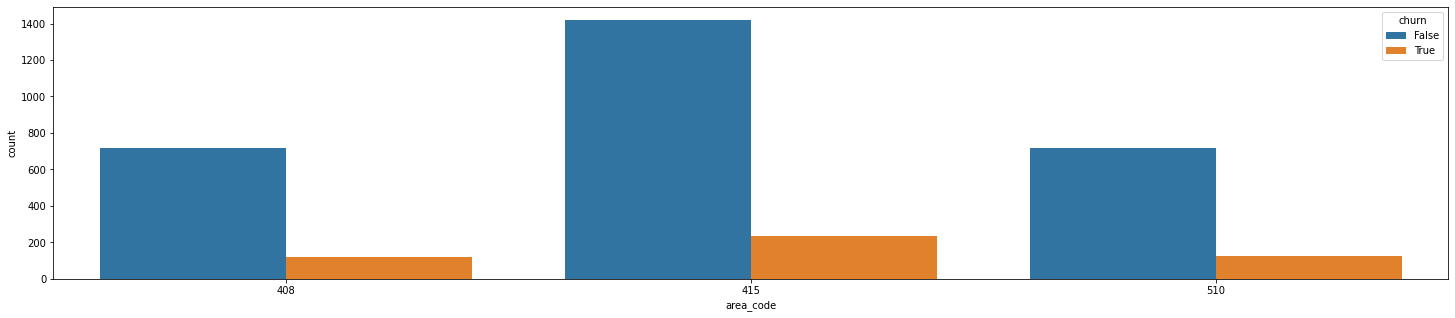

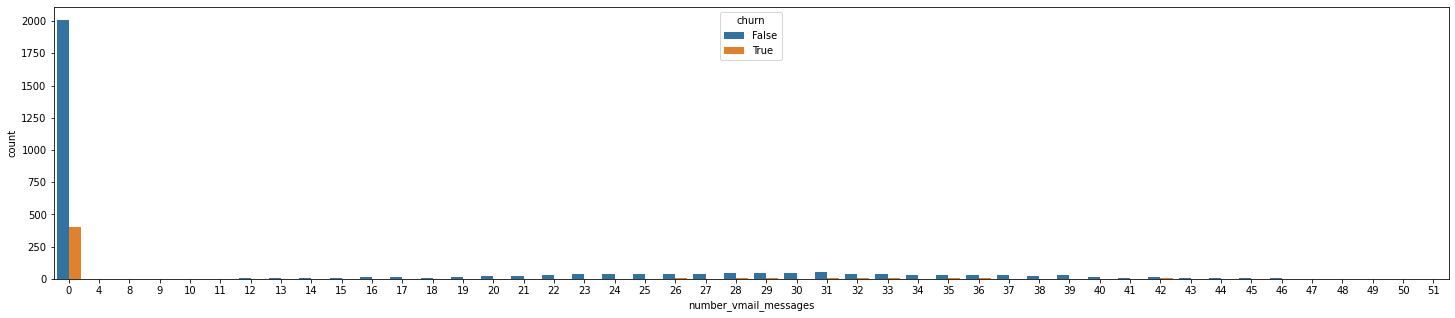

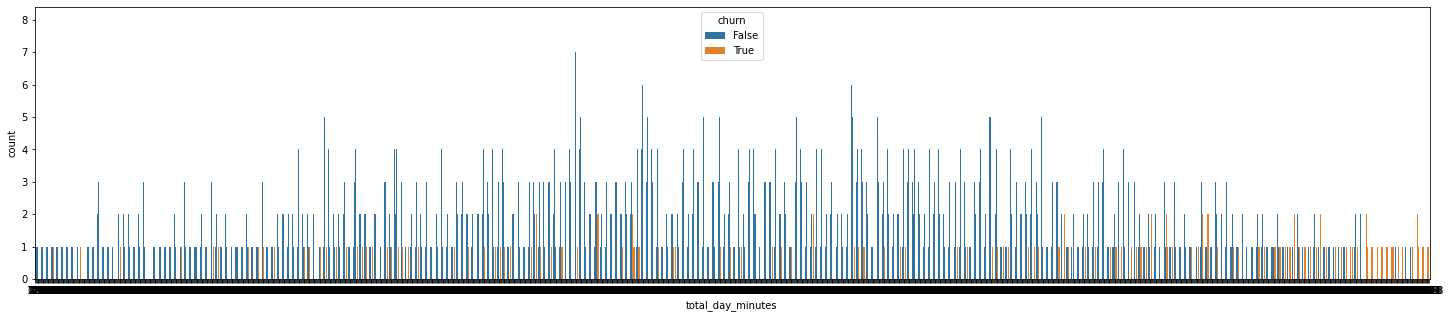

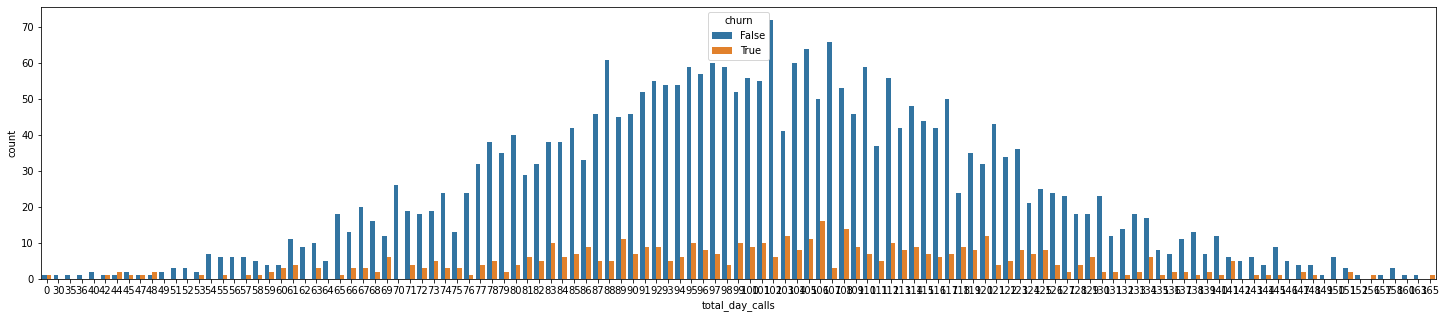

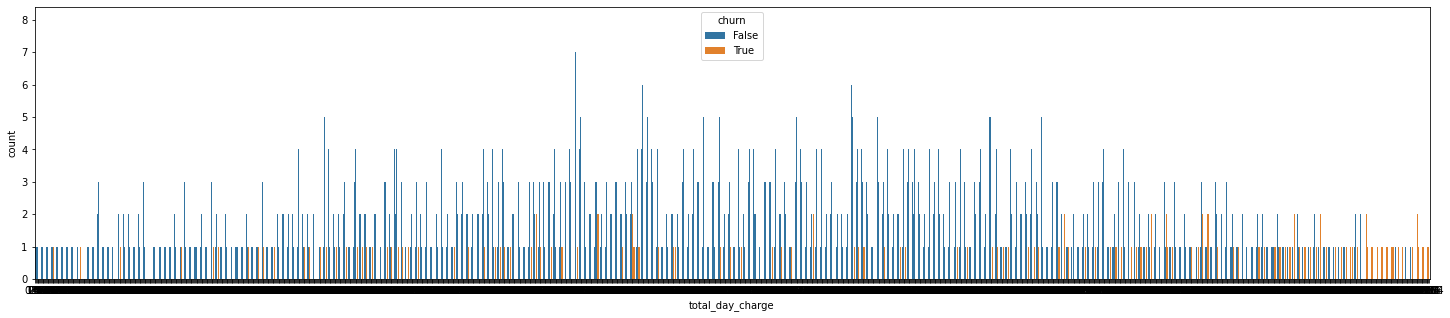

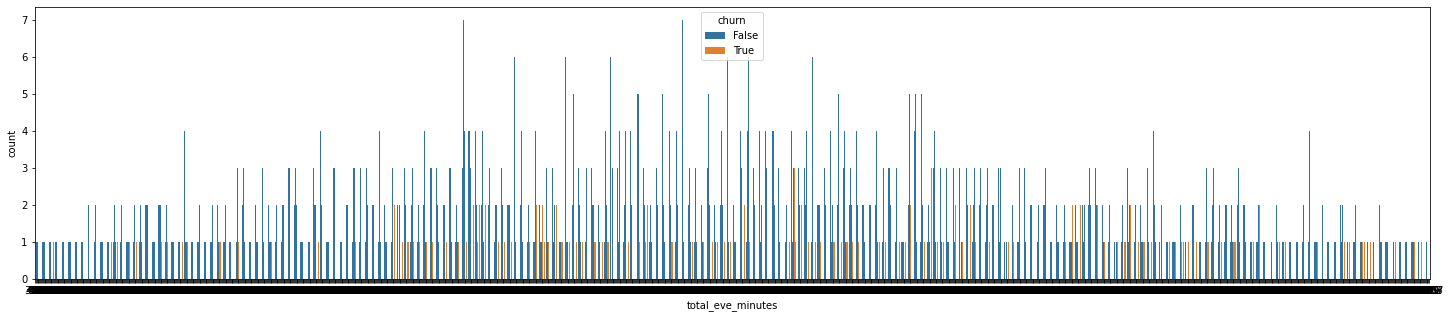

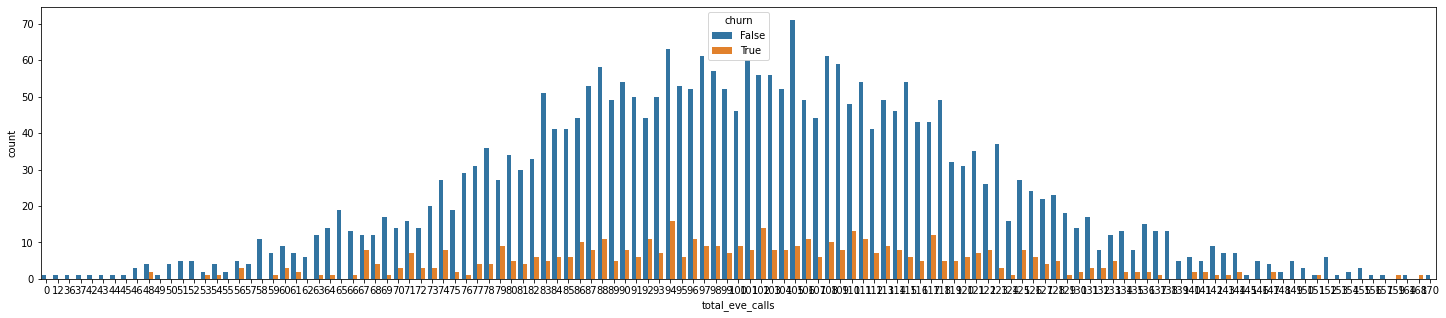

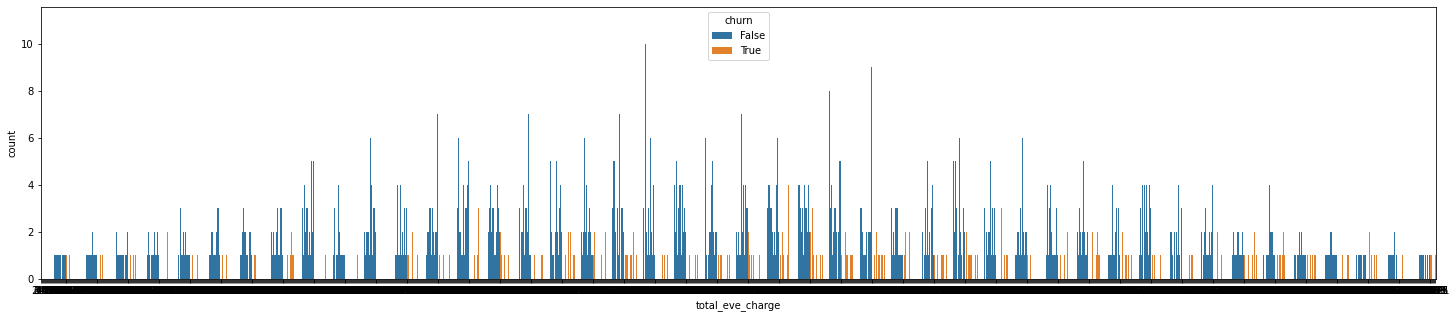

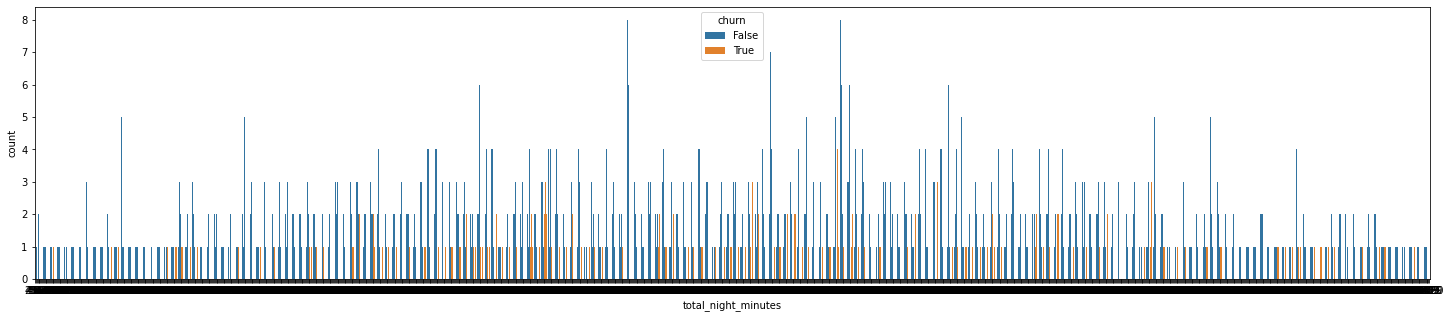

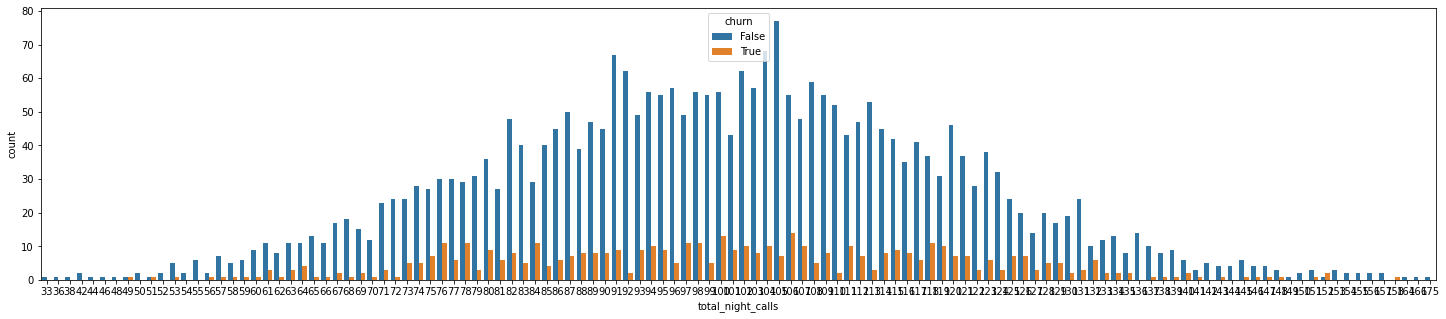

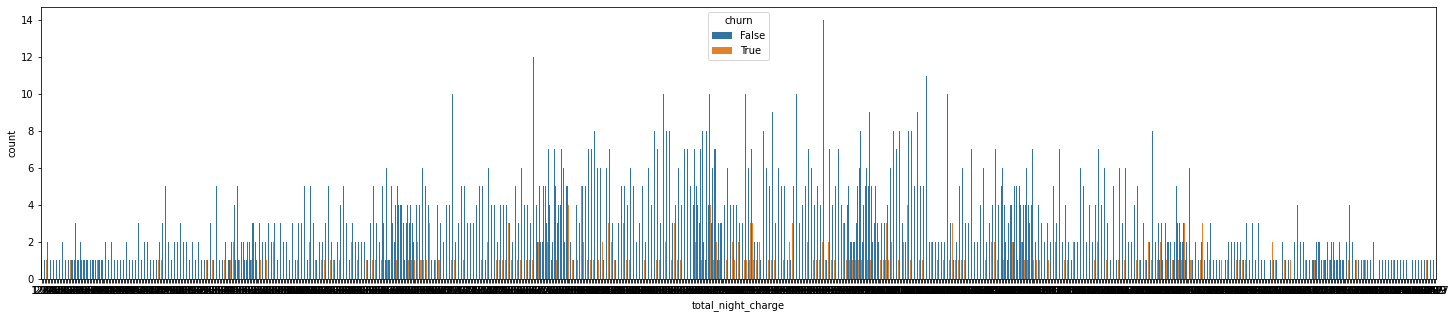

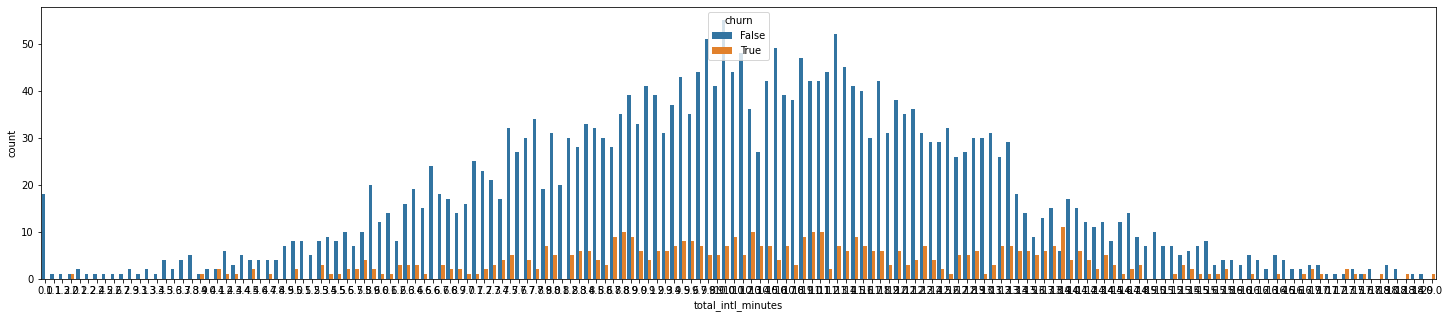

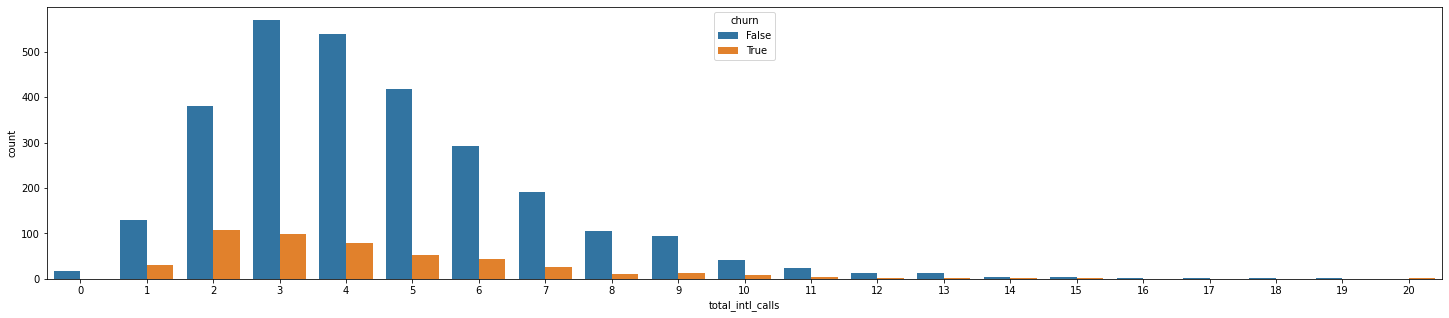

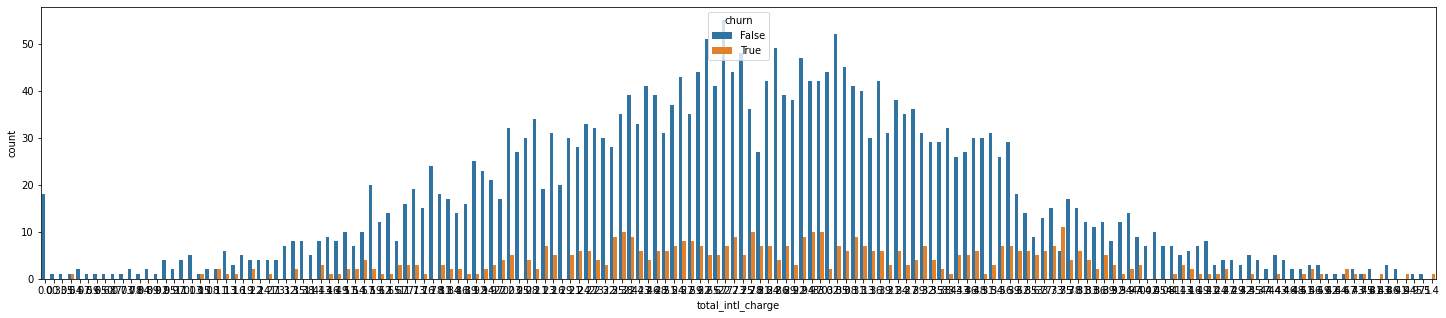

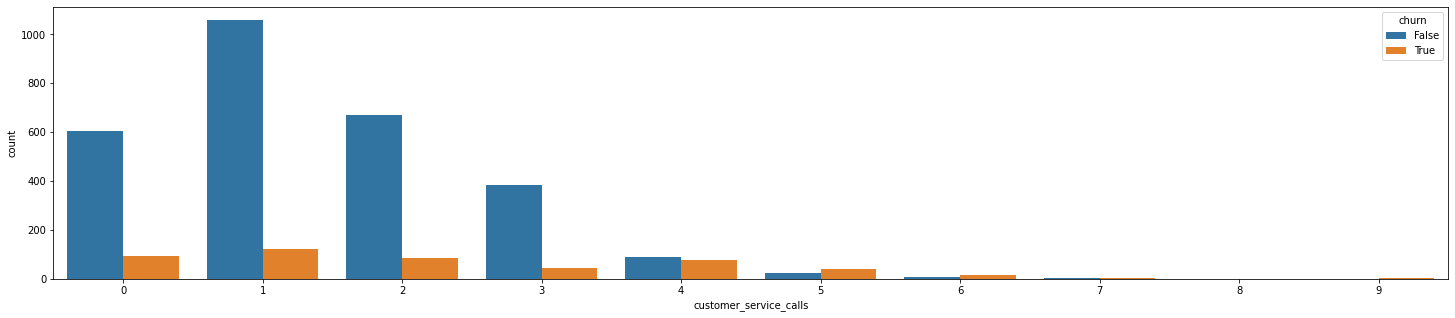

In [ ]:
for i,predictor in enumerate(tele_df.drop(columns=['international_plan','voice_mail_plan','churn'])):
  plt.figure(figsize=(25,5))
  sns.countplot(x=predictor,hue='churn',data=tele_df)

**Observation** 

---
From the above countplots things are not much clear.


In [ ]:
tele_df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

  2.Convert the target variable 'churn' into a binary numeric variable i.e. True=1;False=0

In [ ]:
#dropping 'state', 'account_length', 'area_code' as they are not adding much meaning to the data 
tele_df.drop(['state','account_length',a'area_code'],axis=1,inplace=True)

In [ ]:
#changing the type of variable 'churn' column holds
tele_df.churn = tele_df.churn.astype(int)

In [ ]:
#now checking the count of values in 'churn' column
tele_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [ ]:
tele_df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**3.**Convert all categorical values into dummy variables

In [ ]:
tele_df_dummies=pd.get_dummies(tele_df)
tele_df_dummies.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_No,international_plan_Yes,voice_mail_plan_No,voice_mail_plan_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


  4.Relationship between total_day_minutes and total_day_charge

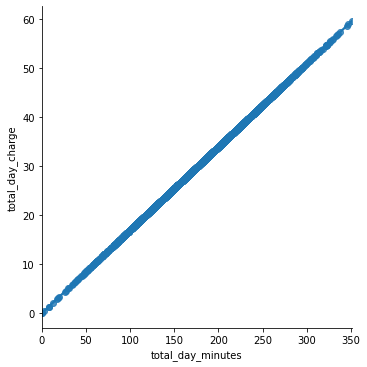

In [ ]:
sns.lmplot(x='total_day_minutes',y='total_day_charge',data=tele_df_dummies)

**Observation**: 

---

If total_day_minutes increases then total_day_charge also increases (i.e,linear relationship) as expected

5.Relationship between total_eve_minutes and total_eve_charge

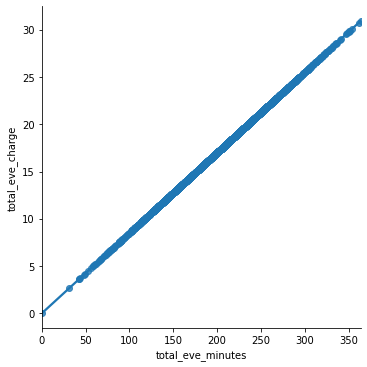

In [ ]:
sns.lmplot(x='total_eve_minutes',y='total_eve_charge',data=tele_df_dummies)

**Observation**:

---

If total_eve_minutes increases then total_eve_charge also increases (i.e,linear relationship) as expected

6.Relationship between total_night_minutes and total_night_charge

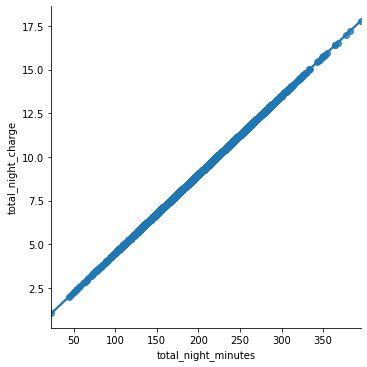

In [ ]:
sns.lmplot(x='total_night_minutes',y='total_night_charge',data=tele_df_dummies)

**Observation**:

---

If total_night_minutes increases then total_night_charge also increases (i.e,linear relationship) as expected

7.Build a correlation of all predicators with 'churn'

In [ ]:
tele_df_dummies.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_No,international_plan_Yes,voice_mail_plan_No,voice_mail_plan_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,1,0


In [ ]:
tele_df_dummies['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [ ]:
tele_df_dummies.corr()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,international_plan_No,international_plan_Yes,voice_mail_plan_No,voice_mail_plan_Yes
number_vmail_messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.008745,0.008745,-0.956927,0.956927
total_day_minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,-0.049396,0.049396,0.001684,-0.001684
total_day_calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,-0.003755,0.003755,0.011086,-0.011086
total_day_charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,-0.049398,0.049398,0.001686,-0.001686
total_eve_minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,-0.019100,0.019100,-0.021545,0.021545
total_eve_calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,-0.006114,0.006114,0.006444,-0.006444
total_eve_charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,-0.019106,0.019106,-0.021559,0.021559
total_night_minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.028905,-0.028905,-0.006079,0.006079
total_night_calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141,-0.012451,0.012451,-0.015553,0.015553
total_night_charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277,0.035496,0.028913,-0.028913,-0.006064,0.006064


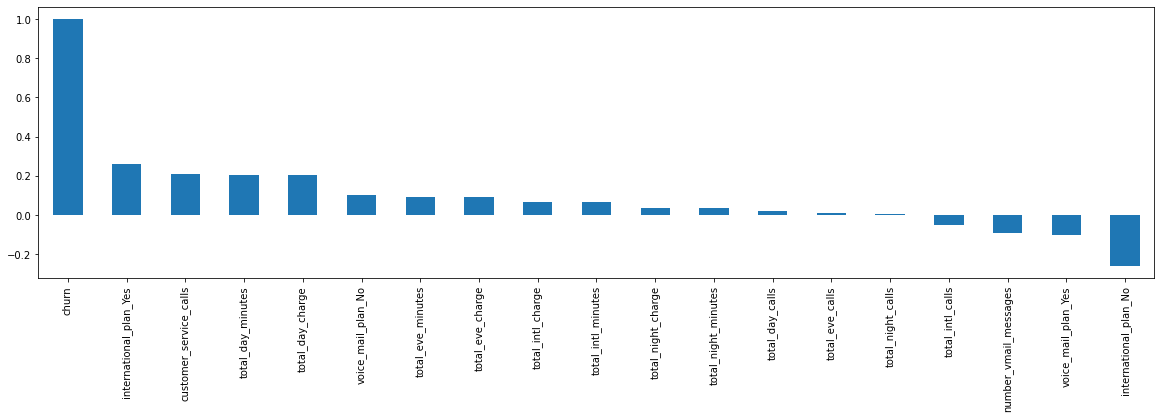

In [ ]:
plt.figure(figsize=(20,5))
tele_df_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

 **Derived Insights**
 
  1.International_plan(Yes),customer_service_calls,total_day_minutes and total_day_charge have relatively HIGHER churn
  2.total_eve_calls and total_night_calls have NO impact on churn
  3.international_plan(No) has LOW impact on churn
      
  This is also evident from the Heatmap below

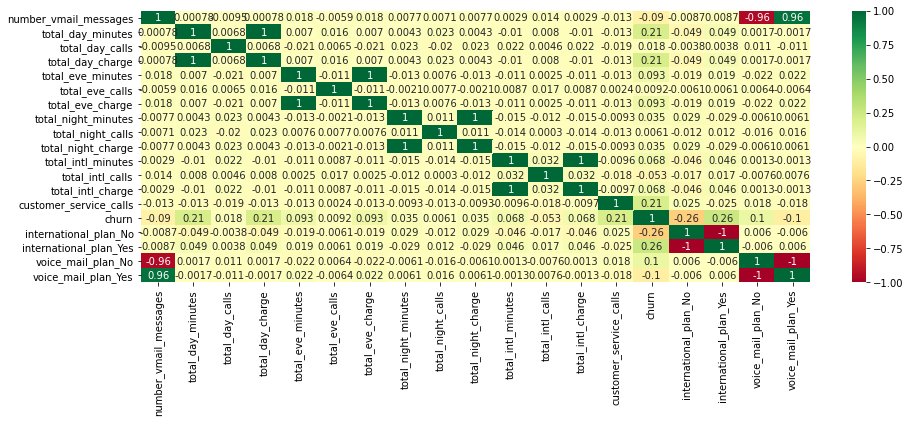

In [ ]:
#checking heat map
plt.figure(figsize=(15,5))
sns.heatmap(tele_df_dummies.corr(),cmap='RdYlGn',annot=True)

From the above heatmap,we see that the highest positive correlation value is 1)0.26(international_plan_Yes)
   2)0.21(total_day_minutes,total_day_charge,customer_service_calls)

**Bivariate Analysis**

In [ ]:
tele_df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
#making seperate df for churners to analyse them properly
tele_df_result0=tele_df.loc[tele_df['churn']==0]
tele_df_result1=tele_df.loc[tele_df['churn']==1]

In [ ]:
# df['churn'].name

'churn'

In [ ]:
#defining a function to make analysis 
def uniplot(df,col,title,hue=None):
  df=df
  col=col
  title=title
  hue=hue
 
  plt.figure(figsize=(20,5))
  plt.xlabel(f'{df[col].name}')
  sns.countplot(data=df,x=col,hue=hue)
  plt.title(title)


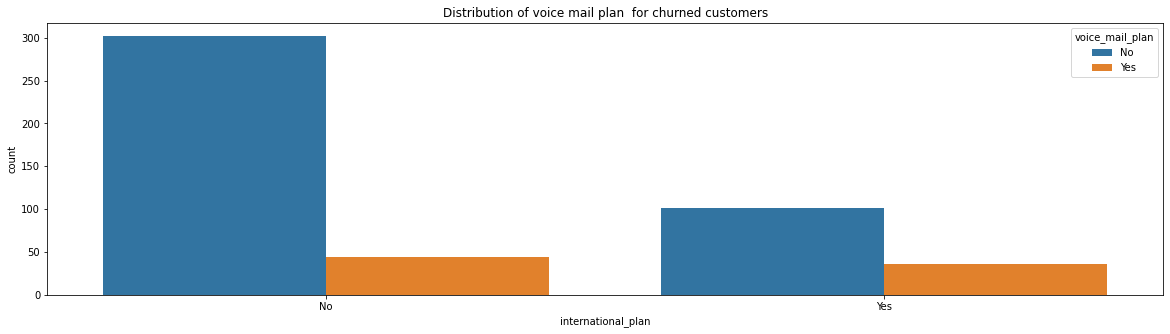

In [ ]:
#true churners who are using voice mails and international plan 
uniplot(tele_df_result1,col='international_plan',title='Distribution of voice mail plan  for churned customers',hue='voice_mail_plan')

**Observation**:

The customers with No International plan and No Voice mail plan are the highest percentage churners.

**Suggestion** :

1.   Give some free minutes of international call as offer to this segment of customers.
2.   Give some trial offer to access voice mails. Also, some discount on regular voice mail plans.

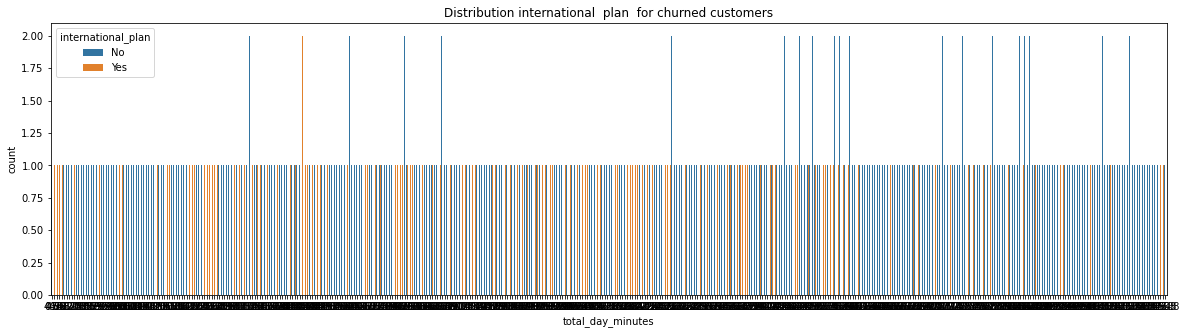

In [ ]:
#total day minutes of true churners and their international plan 
uniplot(tele_df_result1,col='total_day_minutes',title='Distribution international  plan  for churned customers',hue='international_plan')

**Observation**
No evident information can be derived from this distribution


In [ ]:
def churn_dist_plot(col,title):
  title=title
  col=col
  dist_=tele_df_result1[col]
  sns.displot(dist_.values)
  plt.title(title)
  plt.xlabel(f'{tele_df_result1[col].name}')

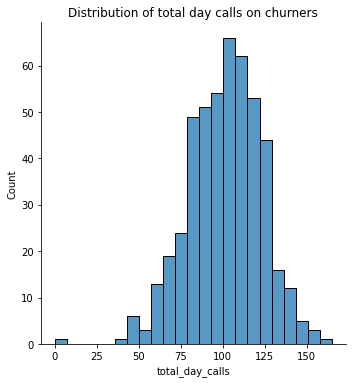

In [ ]:
#total day calls on true churners
churn_dist_plot(col='total_day_calls',title='Distribution of total day calls on churners')

**Observation**:

Highest number of churners are observed when total_day_calls are in between 90 and 110.
People whole are making more calls are leaving. This definitely has something related to quality of service.

**Suggestion**
Improve network quality as well as give customers some attractive offers to keep using services.


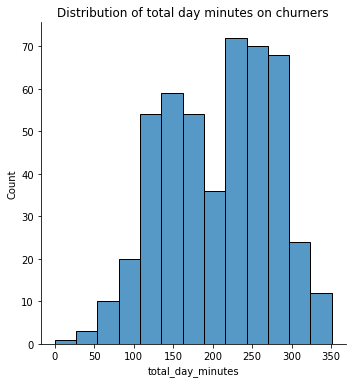

In [ ]:
#total day minutes on true churners
churn_dist_plot(col='total_day_minutes',title='Distribution of total day minutes on churners')

**Observation**:

More churners are observed when total_day_minutes are in  between 240 and 260.

**Suggestion**
One possible measure is that many people are trying to make calls at the same time. So because of large amount of calls there may be call drops. Improving network quality should be one of the priority.

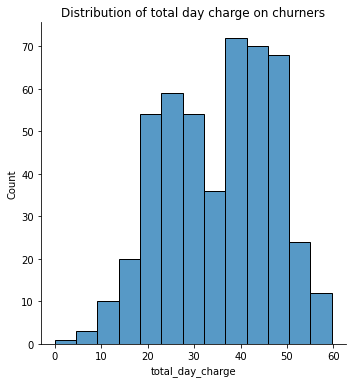

In [ ]:
#total day charge on true churners
churn_dist_plot(col='total_day_charge',title='Distribution of total day charge on churners')

**Observation**:

More churners are observed when total_day_charge  in  between 39 and 47

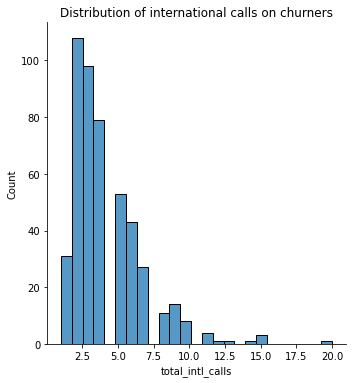

In [ ]:
#total international calls for true churners
churn_dist_plot(col='total_intl_calls',title='Distribution of international calls on churners')

**Observation**:

More churners are observed when total_intl_calls are around 3

**Suggesstion**
This may be one reason that people who are making international calls may find the call rates reasonably high. So give them offers on International Calls.

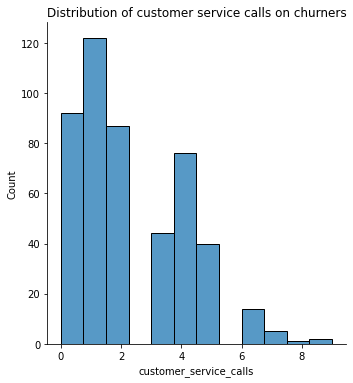

In [ ]:
#customer service calls for true churners
churn_dist_plot(col='customer_service_calls',title='Distribution of customer service calls on churners')

**Observation**:

More churners are observed when customer_service_calls are around 1